# **Gaussian Blur using CUDA**

In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

##**1. Preparing the Library**

In [2]:
!nvcc --version # Check CUDA version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [3]:
!pip install cupy-cuda12x # Install CuPy for CUDA version 12

In [4]:
import cupy as cp
import cv2
import matplotlib.pyplot as plt
import copy

from google.colab import files
from cupyx.scipy import ndimage

##**2. Program**

In [5]:
# Upload picture
uploaded = files.upload()

Saving berotak sengku-256x256.png to berotak sengku-256x256 (1).png


In [6]:
# Prepare variable to hold the image
img_names = []
for fn in uploaded.keys():
  img_names.append(fn)

img = cv2.imread(img_names[0]) # Read the image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert color scale (BGR to RGB)
img = cp.array(img) # Convert image to CuPy array

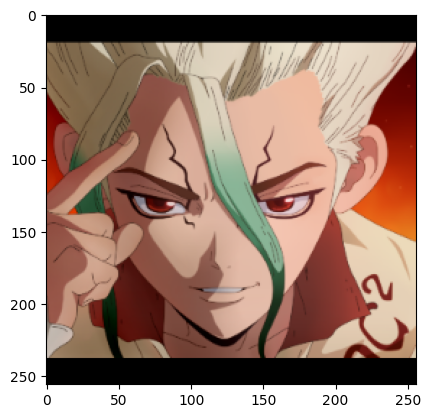

In [7]:
plt.imshow(img.get())

In [8]:
# Create deep copies of img for different Gaussian Blur power
blurred_img = [copy.deepcopy(img) for i in range(3)]

for i in range(3): # Iterate through each image
  for j in range(3): # Iterate through each color
    blurred_img[i][:,:,j] = ndimage.gaussian_filter(img[:,:,j], sigma=(i+1)**2) # Apply Gaussian Blur using CUDA

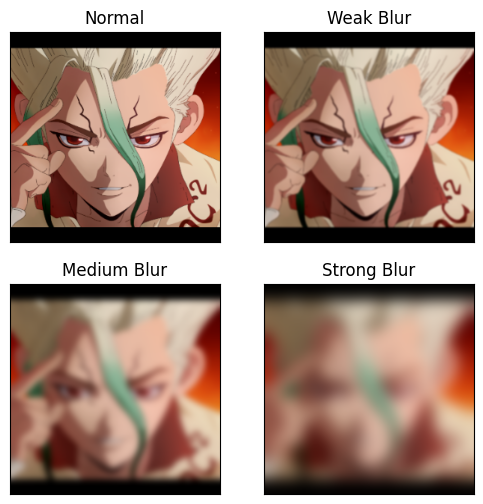

In [9]:
fig, axs = plt.subplots(2,2,figsize=(6,6)) # Create subplots

# Set Title for each Axes
titles = ["Normal", "Weak Blur", "Medium Blur", "Strong Blur"]
for i, ax in enumerate(axs.flat):
  ax.set(title=titles[i],xticks=[],yticks=[]) # Set title for each axes

axs[0,0].imshow(img.get())
axs[0,1].imshow(blurred_img[0].get())
axs[1,0].imshow(blurred_img[1].get())
axs[1,1].imshow(blurred_img[2].get())